# Random Forest - Caso Kyphosis

La Kyphosis es una curvatura convexa excesivamente anormal de la espira vertebral. El dataset kyphosis contiene 81 filas y 4 columnas. Representa datos de niños que han tenido intervenciones quirúrgicas a la columna. El dataset contiene las siguientes columnas:

*Entradas*

- Age: edad en meses
- Number: el número de vértebras involucradas
- Start: el número de la primera vértebra operada

*Salida*
- Kyphosis: vatiable categórica con valores present o absent que indica si se desarrolló kyphosis después de la operación


In [34]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [35]:
df = pd.read_csv('kyphosis.csv')

### Análisis Exploratorio

In [36]:
df.head(2)

,Kyphosis,Age,Number,Start
0,absent,71,3,5
1,absent,158,3,14


In [37]:
df.describe()

,Age,Number,Start
count,81.000000,81.000000,81.000000
mean,83.654321,4.049383,11.493827
std,58.104251,1.619423,4.883962
min,1.000000,2.000000,1.000000
25%,26.000000,3.000000,9.000000
50%,87.000000,4.000000,13.000000
75%,130.000000,5.000000,16.000000
max,206.000000,10.000000,18.000000


<Axes: xlabel='Kyphosis', ylabel='count'>

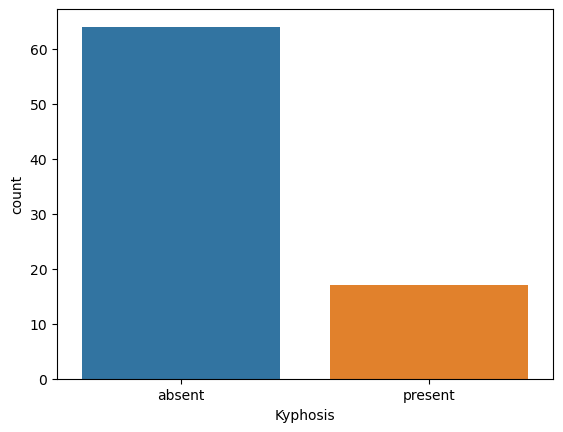

In [38]:
sns.countplot(data=df, x='Kyphosis', label = "Count")

### Formulación del modelo

In [39]:
X = df[['Age','Number','Start']]
y = df['Kyphosis']

In [40]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

In [41]:
encoder = LabelEncoder()
encoder.fit(y)
y = encoder.transform(y)

In [42]:
encoder.classes_

array(['absent', 'present'], dtype=object)

In [43]:
y

array([0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0,
       0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0])

### Cross Validation

In [44]:
from sklearn.model_selection import train_test_split

In [45]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=41)

### Modelo Logístico

In [46]:
from sklearn.linear_model import LogisticRegression

In [47]:
clf = LogisticRegression()
clf.fit(X_train, y_train)

LogisticRegression()

### Evaluación del Modelo

In [48]:
from sklearn.metrics import accuracy_score, confusion_matrix

In [49]:
y_pred = clf.predict(X_test)

In [50]:
accuracy_score(y_test,y_pred)

0.72

In [51]:
confusion_matrix(y_test,y_pred)

array([[17,  2],
       [ 5,  1]], dtype=int64)

## Balanceo de datos

Usando técnica de Smooth

In [52]:
from imblearn.over_sampling import SMOTE
from collections import Counter

In [53]:
Counter(y)

Counter({0: 64, 1: 17})

In [54]:
# Da el resumen de las clases. Variable y hay 64 clases de tipo 0 y 17 clases de tipo 1


In [55]:
#transformar el dataset

oversample=SMOTE()
X,y=oversample.fit_resample(X,y)

In [56]:
Counter(y)

Counter({0: 64, 1: 64})

In [57]:
#Al ejecutar nuevamente el counter vemos que se "balanceo" correctamente.

In [58]:
#ahora hagamos de nuevo las instrucciones pasadas!!!

In [59]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=41)

In [60]:
clf = LogisticRegression()
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

In [61]:
accuracy_score(y_test,y_pred)

0.7948717948717948

In [62]:
confusion_matrix(y_test,y_pred)

array([[16,  2],
       [ 6, 15]], dtype=int64)